In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv("/content/gdrive/MyDrive/DS_Project/dataset/processed_Bullying_Ayman.csv")
df.head()

,Unnamed: 0,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,body_level,engaged_in_a_fight
0,2,3,No,No,No,14,Male,0,0,Never,3 or more,0,Sometimes,Always,No,False,1.0,False
1,5,6,No,No,No,13,Male,0,1,Never,3 or more,0,Most of the time,Always,No,False,1.0,True
2,10,11,No,No,No,15,Male,0,1,Never,3 or more,3,Most of the time,Always,No,True,1.0,True
3,22,23,No,No,Yes,13,Male,0,2,Most of the time,3 or more,0,Rarely,Always,Yes,False,1.0,True
4,23,24,No,No,No,14,Male,0,2,Most of the time,2,0,Always,Sometimes,Yes,False,3.0,True


In [3]:
#body level against number of close friends

In [4]:
from scipy.stats import pearsonr

In [80]:
df2 = df.copy()
df2 = df2.replace({'Close_friends': {'3 or more': 3}})

###hypothesis testing (pearsonr)

#### hypothesis is close friends and body level being dependant

In [81]:
#Pearson's Correlation test
stat, p = pearsonr(df2['Close_friends'], df2['body_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.009, p=0.092
Probably independent


In [87]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
temp = df2.copy()
temp['Close_friends'] = pd.to_numeric(df2['Close_friends'], errors='coerce')
stat, p = spearmanr(temp['Close_friends'], df2['body_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.009, p=0.106
Probably independent


<ipython-input-7-4c1fc93ea595>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Close_friends'][df2['body_level']==0 ], bins=15, ax=ax1).set(title='Body Level 0')
<ipython-input-7-4c1fc93ea595>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Close_friends'][df2['body_level']==1 ], bin

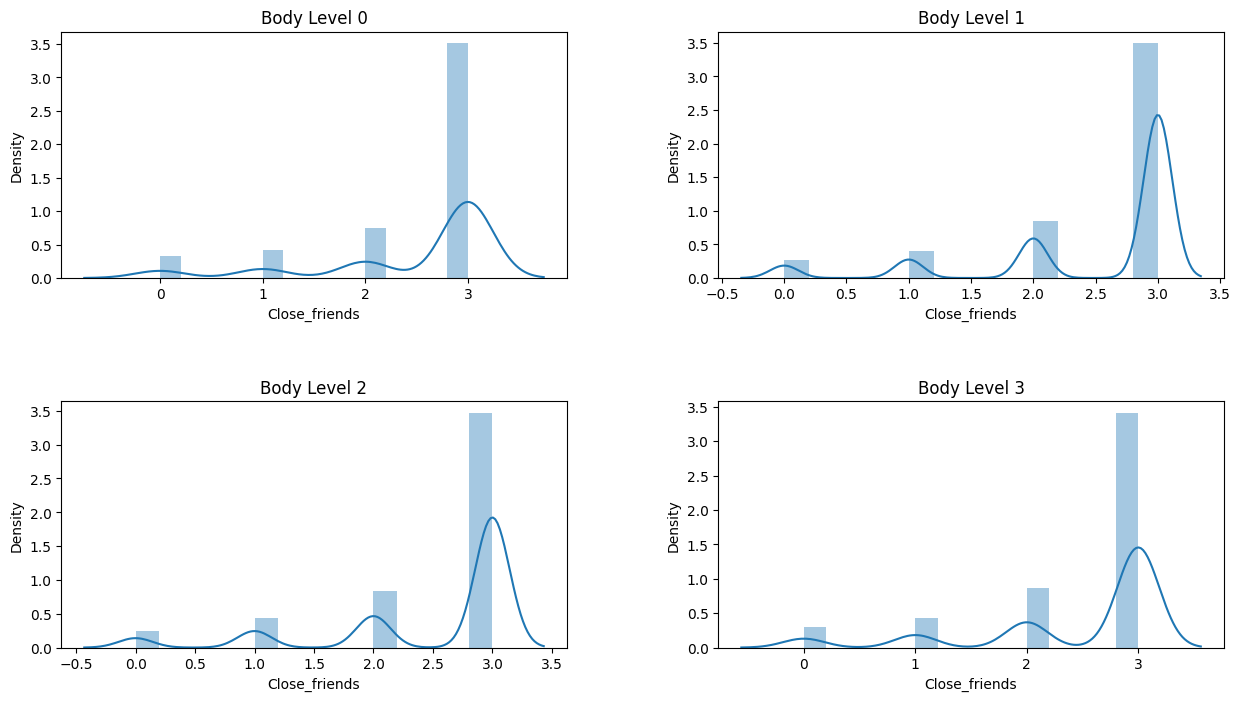

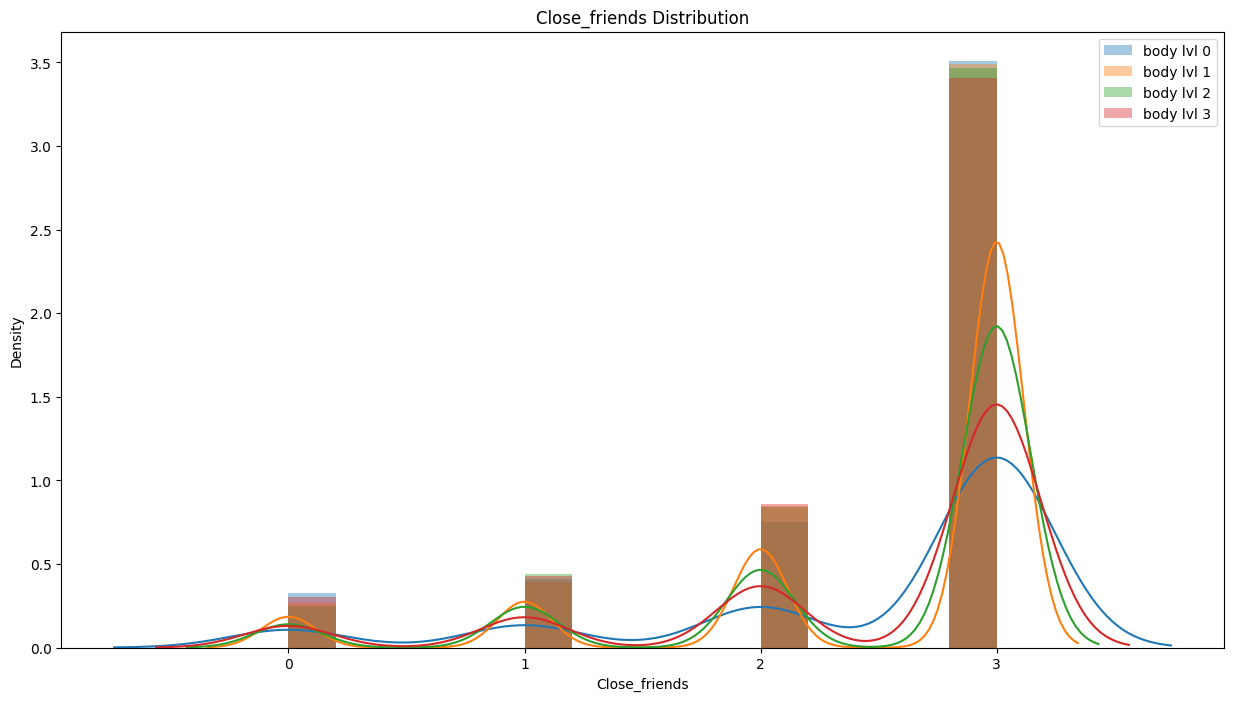

In [7]:
import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(hspace=.5, wspace=0.3)
sns.distplot(df2['Close_friends'][df2['body_level']==0 ], bins=15, ax=ax1).set(title='Body Level 0')
sns.distplot(df2['Close_friends'][df2['body_level']==1 ], bins=15, ax=ax2).set(title='Body Level 1')
sns.distplot(df2['Close_friends'][df2['body_level']==2 ], bins=15, ax=ax3).set(title='Body Level 2')
sns.distplot(df2['Close_friends'][df2['body_level']==3 ], bins=15, ax=ax4).set(title='Body Level 3')
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df2['Close_friends'][df2['body_level']==0 ], label="body lvl 0", bins=15, ax=ax)
sns.distplot(df2['Close_friends'][df2['body_level']==1 ], label="body lvl 1", bins=15, ax=ax)
sns.distplot(df2['Close_friends'][df2['body_level']==2 ], label="body lvl 2", bins=15, ax=ax)
sns.distplot(df2['Close_friends'][df2['body_level']==3 ], label="body lvl 3", bins=15, ax=ax).set(title="Close_friends Distribution")
plt.legend()

In [8]:
perc0_arr=[]
perc1_arr=[]
perc2_arr=[]
perc3_arr=[]
miss_arr=[]
numofstud = []
print(df2['Close_friends'].unique())
print(df2['body_level'].unique())

[3 '2' '0' '1']
[1. 3. 2. 0.]


In [9]:
data = df2.loc[df2['Close_friends']=='0']
result = data.groupby('body_level')['Close_friends'].count()
perc0 = len(df2.loc[ df2['Close_friends'] == '0'].loc[df2['body_level'] == 0]) / len(df2.loc[df2['Close_friends']=='0']) *100
perc0_arr.append(perc0)
perc1 = len(df2.loc[ df2['Close_friends'] == '0'].loc[df2['body_level'] == 1]) / len(df2.loc[df2['Close_friends']=='0']) *100
perc0_arr.append(perc1)
perc2 = len(df2.loc[ df2['Close_friends'] == '0'].loc[df2['body_level'] == 2]) / len(df2.loc[df2['Close_friends']=='0']) *100
perc0_arr.append(perc2)
perc3 = len(df2.loc[ df2['Close_friends'] == '0'].loc[df2['body_level'] == 3]) / len(df2.loc[df2['Close_friends']=='0']) *100
perc0_arr.append(perc3)
print("percentage of 0-close-friends students being underweighted",perc0,"%")
print("percentage of 0-close-friends students having normal body level",perc1,"%")
print("percentage of 0-close-friends students being overweighted",perc2,"%")
print("percentage of 0-close-friends students being obese",perc3,"%")
numofstud.append(data.count())
result

percentage of 0-close-friends students being underweighted 2.452937820878494 %
percentage of 0-close-friends students having normal body level 68.28294352538505 %
percentage of 0-close-friends students being overweighted 20.992584141471763 %
percentage of 0-close-friends students being obese 8.271534512264688 %


body_level
0.0      43
1.0    1197
2.0     368
3.0     145
Name: Close_friends, dtype: int64

In [10]:
data = df2.loc[df2['Close_friends']=='1']
result = data.groupby('body_level')['Close_friends'].count()
perc0 = len(df2.loc[ df2['Close_friends'] == '1'].loc[df2['body_level'] == 0]) / len(df2.loc[df2['Close_friends']=='1']) *100
perc1_arr.append(perc0)
perc1 = len(df2.loc[ df2['Close_friends'] == '1'].loc[df2['body_level'] == 1]) / len(df2.loc[df2['Close_friends']=='1']) *100
perc1_arr.append(perc1)
perc2 = len(df2.loc[ df2['Close_friends'] == '1'].loc[df2['body_level'] == 2]) / len(df2.loc[df2['Close_friends']=='1']) *100
perc1_arr.append(perc2)
perc3 = len(df2.loc[ df2['Close_friends'] == '1'].loc[df2['body_level'] == 3]) / len(df2.loc[df2['Close_friends']=='1']) *100
perc1_arr.append(perc3)
print("percentage of 1-close-friends students being underweighted",perc0,"%")
print("percentage of 1-close-friends students having normal body level",perc1,"%")
print("percentage of 1-close-friends students being overweighted",perc2,"%")
print("percentage of 1-close-friends students being obese",perc3,"%")
numofstud.append(data.count())
result

percentage of 1-close-friends students being underweighted 2.011173184357542 %
percentage of 1-close-friends students having normal body level 66.40595903165736 %
percentage of 1-close-friends students being overweighted 24.022346368715084 %
percentage of 1-close-friends students being obese 7.560521415270019 %


body_level
0.0      54
1.0    1783
2.0     645
3.0     203
Name: Close_friends, dtype: int64

In [11]:
data = df2.loc[df2['Close_friends']=='2']
result = data.groupby('body_level')['Close_friends'].count()
perc0 = len(df2.loc[ df2['Close_friends'] == '2'].loc[df2['body_level'] == 0]) / len(df2.loc[df2['Close_friends']=='2']) *100
perc2_arr.append(perc0)
perc1 = len(df2.loc[ df2['Close_friends'] == '2'].loc[df2['body_level'] == 1]) / len(df2.loc[df2['Close_friends']=='2']) *100
perc2_arr.append(perc1)
perc2 = len(df2.loc[ df2['Close_friends'] == '2'].loc[df2['body_level'] == 2]) / len(df2.loc[df2['Close_friends']=='2']) *100
perc2_arr.append(perc2)
perc3 = len(df2.loc[ df2['Close_friends'] == '2'].loc[df2['body_level'] == 3]) / len(df2.loc[df2['Close_friends']=='2']) *100
perc2_arr.append(perc3)
print("percentage of 2-close-friends students being underweighted",perc0,"%")
print("percentage of 2-close-friends students having normal body level",perc1,"%")
print("percentage of 2-close-friends students being overweighted",perc2,"%")
print("percentage of 2-close-friends students being obese",perc3,"%")
numofstud.append(data.count())
result

percentage of 2-close-friends students being underweighted 1.7619561308881697 %
percentage of 2-close-friends students having normal body level 68.75224739302409 %
percentage of 2-close-friends students being overweighted 22.096368212873067 %
percentage of 2-close-friends students being obese 7.389428263214672 %


body_level
0.0      98
1.0    3824
2.0    1229
3.0     411
Name: Close_friends, dtype: int64

In [12]:
data = df2.loc[df2['Close_friends']==3]
result = data.groupby('body_level')['Close_friends'].count()
perc0 = len(df2.loc[ df2['Close_friends'] == 3].loc[df2['body_level'] == 0]) / len(df2.loc[df2['Close_friends']==3]) *100
perc3_arr.append(perc0)
perc1 = len(df2.loc[ df2['Close_friends'] == 3].loc[df2['body_level'] == 1]) / len(df2.loc[df2['Close_friends']==3]) *100
perc3_arr.append(perc1)
perc2 = len(df2.loc[ df2['Close_friends'] == 3].loc[df2['body_level'] == 2]) / len(df2.loc[df2['Close_friends']==3]) *100
perc3_arr.append(perc2)
perc3 = len(df2.loc[ df2['Close_friends'] == 3].loc[df2['body_level'] == 3]) / len(df2.loc[df2['Close_friends']==3]) *100
perc3_arr.append(perc3)
print("percentage of 3-close-friends students being underweighted",perc0,"%")
print("percentage of 3-close-friends students having normal body level",perc1,"%")
print("percentage of 3-close-friends students being overweighted",perc2,"%")
print("percentage of 3-close-friends students being obese",perc3,"%")
numofstud.append(data.count())
result

percentage of 3-close-friends students being underweighted 2.0010462987182844 %
percentage of 3-close-friends students having normal body level 68.75490452524195 %
percentage of 3-close-friends students being overweighted 22.151015781672335 %
percentage of 3-close-friends students being obese 7.093033394367425 %


body_level
0.0      459
1.0    15771
2.0     5081
3.0     1627
Name: Close_friends, dtype: int64

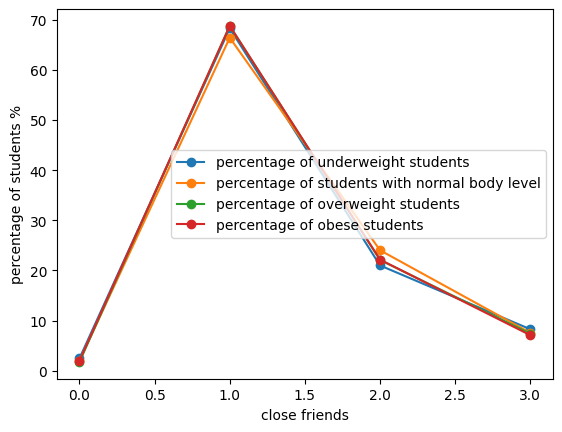

In [13]:
xpoints = np.array([0,1,2,3])
perc0_arr = np.array(perc0_arr)
perc1_arr = np.array(perc1_arr)
perc2_arr = np.array(perc2_arr)
perc3_arr = np.array(perc3_arr)
plt.plot(xpoints,perc0_arr,marker = 'o')
plt.plot(xpoints,perc1_arr,marker = 'o')
plt.plot(xpoints,perc2_arr,marker = 'o')
plt.plot(xpoints,perc3_arr,marker = 'o')
plt.xlabel('close friends')
plt.ylabel('percentage of students %')
plt.legend(['percentage of underweight students','percentage of students with normal body level','percentage of overweight students','percentage of obese students'])
plt.show()

In [14]:
#Q7
#Is being (overweight) related to cyberbullying, does it generalize to bullying at school?

In [15]:
# how many overweight people were cyberbullied
df1 = df[['body_level','Cyber_bullied_in_past_12_months','Bullied_on_school_property_in_past_12_months']].copy()
df1['overweight'] = df1['body_level']>=2 
df1['bullied'] = 'No'
df.loc[df['Bullied_on_school_property_in_past_12_months']=='Yes'].loc[df['Bullied_not_on_school_property_in_past_12_months']=='Yes'].loc[df[ 'Cyber_bullied_in_past_12_months']=='Yes'] 
df1.head()


,body_level,Cyber_bullied_in_past_12_months,Bullied_on_school_property_in_past_12_months,overweight,bullied
0,1.0,No,No,False,No
1,1.0,No,No,False,No
2,1.0,No,No,False,No
3,1.0,Yes,No,False,No
4,3.0,No,No,True,No


In [16]:
#how many overweight people were cyberbullied
data = df1.loc[df1['overweight']==True]
result = data.groupby('Cyber_bullied_in_past_12_months')['overweight'].count()
perc = len(df1.loc[ df1['overweight'] == True].loc[df1['Cyber_bullied_in_past_12_months'] == 'Yes']) / len(df1.loc[df1['overweight']==True]) *100
print("percentage of overweight students being cyberbullied",perc,"%")
result

percentage of overweight students being cyberbullied 21.557317952415282 %


Cyber_bullied_in_past_12_months
No     7616
Yes    2093
Name: overweight, dtype: int64

(-1.1677659674363396,
 1.1444620431838577,
 -1.185723328710643,
 1.185723352689088)

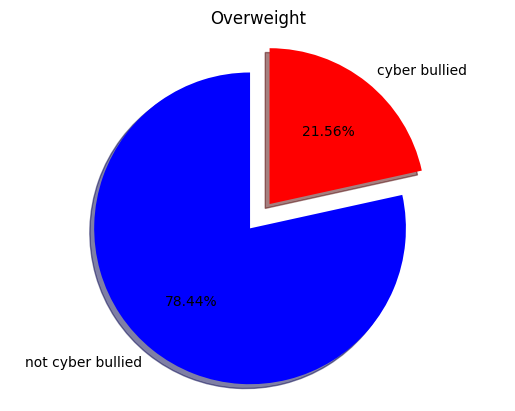

In [17]:
labels= ['not cyber bullied', 'cyber bullied']
colors=['blue', 'red']
sizes= [(result[0]/data["overweight"].count()), (result[1]/data["overweight"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Overweight')
plt.axis('equal')

In [18]:
#how many cyberbullied people were overweight
data = df1.loc[df1['Cyber_bullied_in_past_12_months']=='Yes']
result = data.groupby('overweight')['Cyber_bullied_in_past_12_months'].count()
perc = len(df1.loc[df1['Cyber_bullied_in_past_12_months'] == 'Yes'].loc[ df1['overweight'] == True]) / len(df1.loc[df1['Cyber_bullied_in_past_12_months']=='Yes']) *100
print("percentage of cyberbullied students being overweight",perc,"%")
result

percentage of cyberbullied students being overweight 28.360433604336045 %


overweight
False    5287
True     2093
Name: Cyber_bullied_in_past_12_months, dtype: int64

(-1.1855437414035197,
 1.1855439036028363,
 -1.1691486696494509,
 1.1691522605355906)

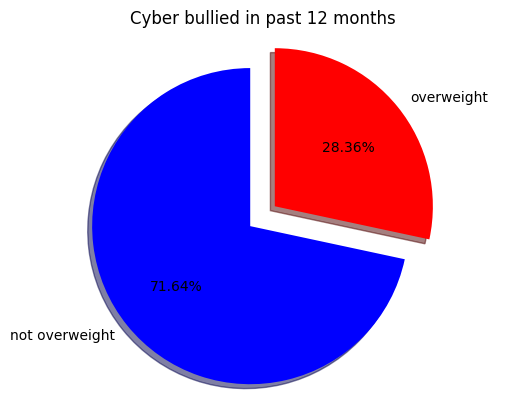

In [19]:
labels= ['not overweight', 'overweight']
colors=['blue', 'red']
sizes= [(result[0]/data["Cyber_bullied_in_past_12_months"].count()), (result[1]/data["Cyber_bullied_in_past_12_months"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Cyber bullied in past 12 months')
plt.axis('equal')

In [20]:
# how many bullied on school were overweight
data = df1.loc[df1['Bullied_on_school_property_in_past_12_months']=='Yes']
result = data.groupby('overweight')['Bullied_on_school_property_in_past_12_months'].count()
perc = len(df1.loc[df1['Bullied_on_school_property_in_past_12_months'] == 'Yes'].loc[ df1['overweight'] == True]) / len(df1.loc[df1['Bullied_on_school_property_in_past_12_months']=='Yes']) *100
print("percentage of bullied students at school being overweight",perc,"%")
result

percentage of bullied students at school being overweight 31.411935953420674 %


overweight
False    4712
True     2158
Name: Bullied_on_school_property_in_past_12_months, dtype: int64

(-1.1917712610999431,
 1.1917709629719142,
 -1.160646095461225,
 1.1606466256956385)

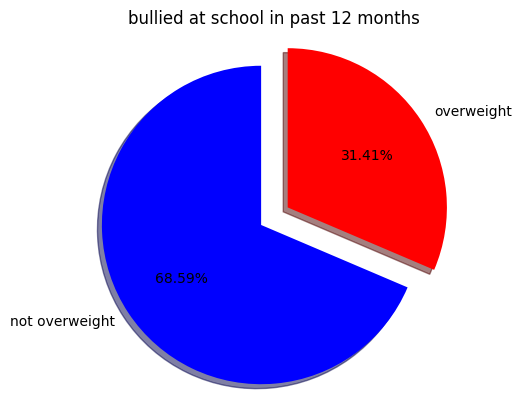

In [21]:
# data = df1.loc[df1["Cyber_bullied_in_past_12_months"] == ]Yes]
# result = data.groupby('overweight')['Cyber_bullied_in_past_12_months'].count()
labels= ['not overweight', 'overweight']
colors=['blue', 'red']
sizes= [(result[0]/data["Bullied_on_school_property_in_past_12_months"].count()), (result[1]/data["Bullied_on_school_property_in_past_12_months"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('bullied at school in past 12 months')
plt.axis('equal')

In [22]:
# how many overweight people were bullied on school
data = df1.loc[df1['overweight']==True]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['overweight'].count()
perc = len(df1.loc[ df1['overweight'] == True].loc[df1['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df1.loc[df1['overweight']==True]) *100
print("percentage of overweight students being bullied at school",perc,"%")
result

percentage of overweight students being bullied at school 22.226799876403337 %


Bullied_on_school_property_in_past_12_months
No     7551
Yes    2158
Name: overweight, dtype: int64

(-1.1699616206934575,
 1.1548192715901797,
 -1.1842546656852975,
 1.18425472289377)

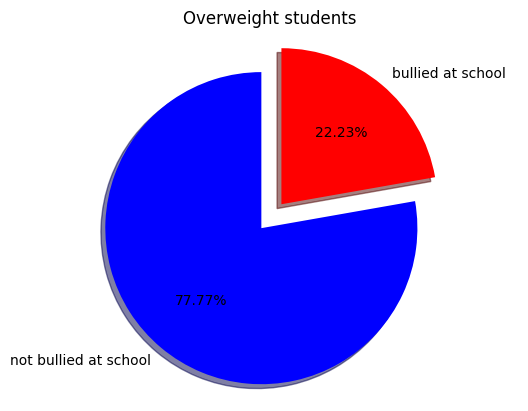

In [23]:
labels= ['not bullied at school', 'bullied at school']
colors=['blue', 'red']
sizes= [(result[0]/data["overweight"].count()), (result[1]/data["overweight"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Overweight students')
plt.axis('equal')

In [24]:
#general bullying
df1['bullied'] = 'No'
df1.loc[(df['Bullied_not_on_school_property_in_past_12_months'] =='Yes')|(df['Bullied_on_school_property_in_past_12_months']=='Yes')|(df['Cyber_bullied_in_past_12_months']=='Yes'), 'bullied'] = 'Yes'

In [25]:
#how many bullied people were overweight
data = df1.loc[df1['bullied']=='Yes']
result = data.groupby('overweight')['bullied'].count()
perc = len(df1.loc[df1['bullied'] == 'Yes'].loc[ df1['overweight'] == True]) / len(df1.loc[df1['bullied']=='Yes']) *100
print("percentage of bullied students being overweight",perc,"%")
result

percentage of bullied students being overweight 29.43593574897273 %


overweight
False    9445
True     3940
Name: bullied, dtype: int64

(-1.1878315322414752,
 1.1878310821476934,
 -1.1662205205607814,
 1.166222993484953)

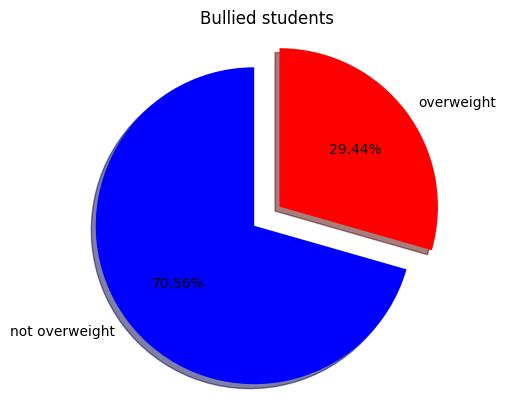

In [26]:
labels= ['not overweight', 'overweight']
colors=['blue', 'red']
sizes= [(result[0]/data["bullied"].count()), (result[1]/data["bullied"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Bullied students')
plt.axis('equal')

In [27]:
# how many overweight people were bullied
data = df1.loc[df1['overweight']==True]
result = data.groupby('bullied')['overweight'].count()
perc = len(df1.loc[ df1['overweight'] == True].loc[df1['bullied'] == 'Yes']) / len(df1.loc[df1['overweight']==True]) *100
print("percentage of overweight students being bullied",perc,"%")
result

percentage of overweight students being bullied 40.580904315583474 %


bullied
No     5769
Yes    3940
Name: overweight, dtype: int64

(-1.2052176286739777,
 1.205210478091288,
 -1.1320764625098887,
 1.1320770747948763)

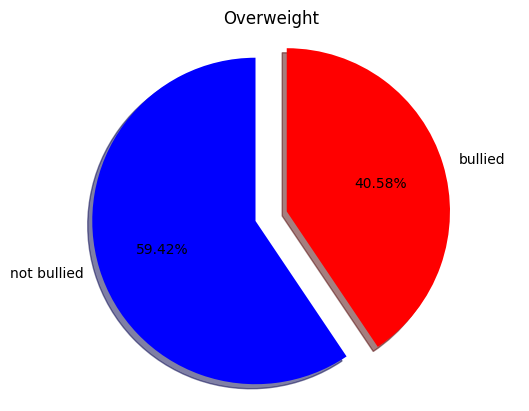

In [28]:
labels= ['not bullied', 'bullied']
colors=['blue', 'red']
sizes= [(result[0]/data["overweight"].count()), (result[1]/data["overweight"].count())]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Overweight')
plt.axis('equal')

In [29]:
#Q11 
#Is a student suffering from bullying increasing the times of missing school with no permission in the future?

In [30]:
df2 = df[['Custom_Age','Bullied_on_school_property_in_past_12_months','Missed_classes_or_school_without_permission']].copy()
# df2['overweight'] = df2['body_level']>=2 
df2.head()

,Custom_Age,Bullied_on_school_property_in_past_12_months,Missed_classes_or_school_without_permission
0,14,No,False
1,13,No,False
2,15,No,True
3,13,No,False
4,14,No,False


In [31]:
perc_arr=[]
miss_arr=[]
numofstud = []
df2['Custom_Age'].unique()

array([14, 13, 15, 16, 17, 12, 18, 11])

In [32]:
data = df2.loc[df2['Custom_Age']==11]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 11].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==11]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 11].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==11]) *100
miss_arr.append(perc)
print("percentage of 11-year-old students being bullied",perc,"%")
numofstud.append(data.count())
result

percentage of 11-year-old students being bullied 33.33333333333333 %


Bullied_on_school_property_in_past_12_months
No     10
Yes     2
Name: Custom_Age, dtype: int64

In [33]:
data = df2.loc[df2['Custom_Age']==12]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 12].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==12]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 12].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==12]) *100
miss_arr.append(perc)
print("percentage of 12-year-old students being bullied",perc,"%")
numofstud.append(data.count())
result

percentage of 12-year-old students being bullied 21.428571428571427 %


Bullied_on_school_property_in_past_12_months
No     44
Yes    12
Name: Custom_Age, dtype: int64

In [34]:
data = df2.loc[df2['Custom_Age']==13]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 13].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==13]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 13].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==13]) *100
miss_arr.append(perc)
print("percentage of 13-year-old students being bullied",perc,"%")
numofstud.append(data.count())
result

percentage of 13-year-old students being bullied 21.195340843994654 %


Bullied_on_school_property_in_past_12_months
No     3978
Yes    1259
Name: Custom_Age, dtype: int64

In [35]:
data = df2.loc[df2['Custom_Age']==14]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 14].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==14]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 14].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==14]) *100
miss_arr.append(perc)
numofstud.append(data.count())
print("percentage of 14-year-old students being bullied",perc,"%")
result

percentage of 14-year-old students being bullied 23.783551026266686 %


Bullied_on_school_property_in_past_12_months
No     5375
Yes    1592
Name: Custom_Age, dtype: int64

In [36]:
data = df2.loc[df2['Custom_Age']==15]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 15].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==15]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 15].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==15]) *100
miss_arr.append(perc)
numofstud.append(data.count())
print("percentage of 15-year-old students being bullied",perc,"%")
result

percentage of 15-year-old students being bullied 27.63641311743094 %


Bullied_on_school_property_in_past_12_months
No     5791
Yes    1558
Name: Custom_Age, dtype: int64

In [37]:
data = df2.loc[df2['Custom_Age']==16]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 16].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==16]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 16].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==16]) *100
miss_arr.append(perc)
numofstud.append(data.count())
print("percentage of 16-year-old students being bullied",perc,"%")
result

percentage of 16-year-old students being bullied 32.40047299960583 %


Bullied_on_school_property_in_past_12_months
No     6177
Yes    1434
Name: Custom_Age, dtype: int64

In [38]:
data = df2.loc[df2['Custom_Age']==17]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 17].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==17]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 17].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==17]) *100
miss_arr.append(perc)
numofstud.append(data.count())
print("percentage of 17-year-old students being bullied",perc,"%")
result

percentage of 17-year-old students being bullied 38.24657534246575 %


Bullied_on_school_property_in_past_12_months
No     4500
Yes     975
Name: Custom_Age, dtype: int64

In [39]:
data = df2.loc[df2['Custom_Age']==18]
result = data.groupby('Bullied_on_school_property_in_past_12_months')['Custom_Age'].count()
perc = len(df2.loc[ df2['Custom_Age'] == 18].loc[df2['Bullied_on_school_property_in_past_12_months'] == 'Yes']) / len(df2.loc[df2['Custom_Age']==18]) *100
perc_arr.append(perc)
perc = len(df2.loc[ df2['Custom_Age'] == 18].loc[df2['Missed_classes_or_school_without_permission'] == True]) / len(df2.loc[df2['Custom_Age']==18]) *100
miss_arr.append(perc)
numofstud.append(data.count())
print("percentage of 18-year-old students being bullied",perc,"%")
result

percentage of 18-year-old students being bullied 42.42424242424242 %


Bullied_on_school_property_in_past_12_months
No     193
Yes     38
Name: Custom_Age, dtype: int64

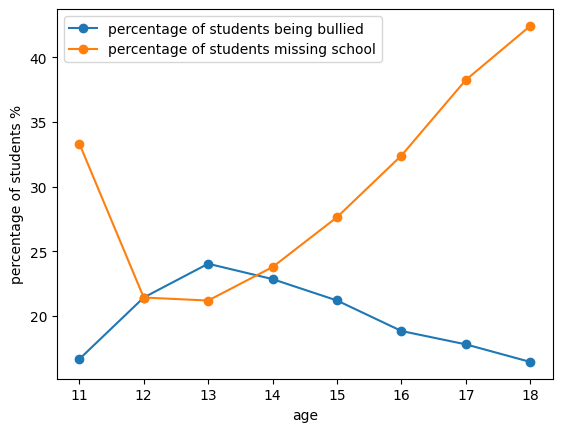

In [40]:
xpoints = np.array([11,12,13,14,15,16,17,18])
perc_arr = np.array(perc_arr)
plt.plot(xpoints,perc_arr,marker = 'o')
plt.plot(xpoints,miss_arr,marker = 'o')
plt.xlabel('age')
plt.ylabel('percentage of students %')
plt.legend(['percentage of students being bullied','percentage of students missing school'])
plt.show()

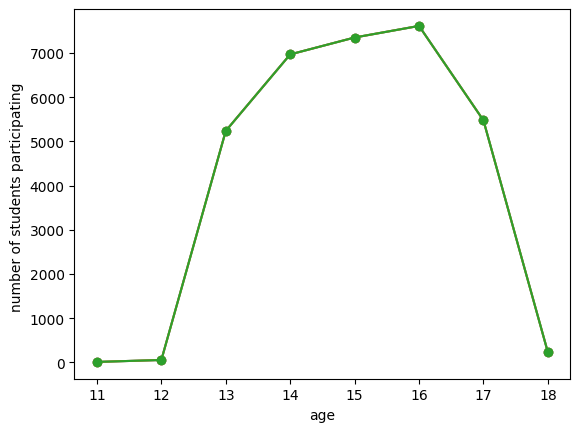

In [41]:
numofstud= np.array(numofstud)
plt.plot(xpoints,numofstud,marker='o')
plt.xlabel('age')
plt.ylabel('number of students participating ')
plt.show()

In [59]:
#Q12
#Why Bullying happen?

In [90]:
df3=df.copy()
# not_bullied = df3[df3["Bullied_on_school_property_in_past_12_months"]=="No"].index
# bullied = df3[df3["Bullied_on_school_property_in_past_12_months"]=="Yes"].index
# df3.loc[bullied,"Bullied_on_school_property_in_past_12_months"] = 1
# df3.loc[not_bullied,"Bullied_on_school_property_in_past_12_months"] = 0

# print(df3['Close_friends'].unique())

df3 = df3.replace({'Bullied_on_school_property_in_past_12_months': {'No': 0, 'Yes': 1}})
df3 = df3.replace({'Sex': {'Male': 1, 'Female': 0}})
df3 = df3.replace({'Close_friends': {'3 or more': 3}})
df3 = df3.replace({'Most_of_the_time_or_always_felt_lonely': {'No': 0, 'Yes': 1}})
df3 = df3.replace({'Parents_understand_problems': {'Most of the time': 3, 'Sometimes': 2,'Rarely': 1,'Always': 4,'Never':0}})
df3 = df3.replace({'Felt_lonely': {'Most of the time': 3, 'Sometimes': 2,'Rarely': 1,'Always': 4,'Never':0}})
df3 = df3.replace({'Other_students_kind_and_helpful': {'Most of the time': 3, 'Sometimes': 2,'Rarely': 1,'Always': 4,'Never':0}})
df3 = df3.replace({'Bullied_not_on_school_property_in_past_12_months': {'No': 0, 'Yes': 1}})
df3 = df3.replace({'Cyber_bullied_in_past_12_months': {'No': 0, 'Yes': 1}})
df3 = df3.replace({'Missed_classes_or_school_without_permission': {True: 1, False: 0}})
df3 = df3.replace({'engaged_in_a_fight': {True: 1, False: 0}})
df3['obese'] = df3['body_level']==3
df3['overweight'] = df3['body_level']==2 
df3['underweight'] = df3['body_level']==0 
df3['bullied'] = 0
df3.loc[(df3['Bullied_not_on_school_property_in_past_12_months'] ==1)|(df3['Bullied_on_school_property_in_past_12_months']==1)|(df3['Cyber_bullied_in_past_12_months']==1), 'bullied'] = 1
df3.head()


,Unnamed: 0,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,...,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,body_level,engaged_in_a_fight,obese,overweight,underweight,bullied
0,2,3,0,0,0,14,1,0,0,0,...,2,4,0,0,1.0,0,False,False,False,0
1,5,6,0,0,0,13,1,0,1,0,...,3,4,0,0,1.0,1,False,False,False,0
2,10,11,0,0,0,15,1,0,1,0,...,3,4,0,1,1.0,1,False,False,False,0
3,22,23,0,0,1,13,1,0,2,3,...,1,4,1,0,1.0,1,False,False,False,1
4,23,24,0,0,0,14,1,0,2,3,...,4,2,1,0,3.0,1,True,False,False,0


In [91]:
df3.corr(numeric_only = False)['bullied']

Unnamed: 0                                         -0.008167
record                                             -0.008157
Bullied_on_school_property_in_past_12_months        0.620472
Bullied_not_on_school_property_in_past_12_months    0.645674
Cyber_bullied_in_past_12_months                     0.649475
Custom_Age                                          0.006315
Sex                                                -0.107698
Physically_attacked                                 0.159084
Physical_fighting                                   0.080093
Felt_lonely                                         0.276277
Close_friends                                      -0.063022
Miss_school_no_permission                           0.072284
Other_students_kind_and_helpful                    -0.135665
Parents_understand_problems                        -0.112056
Most_of_the_time_or_always_felt_lonely              0.215988
Missed_classes_or_school_without_permission         0.077551
body_level              

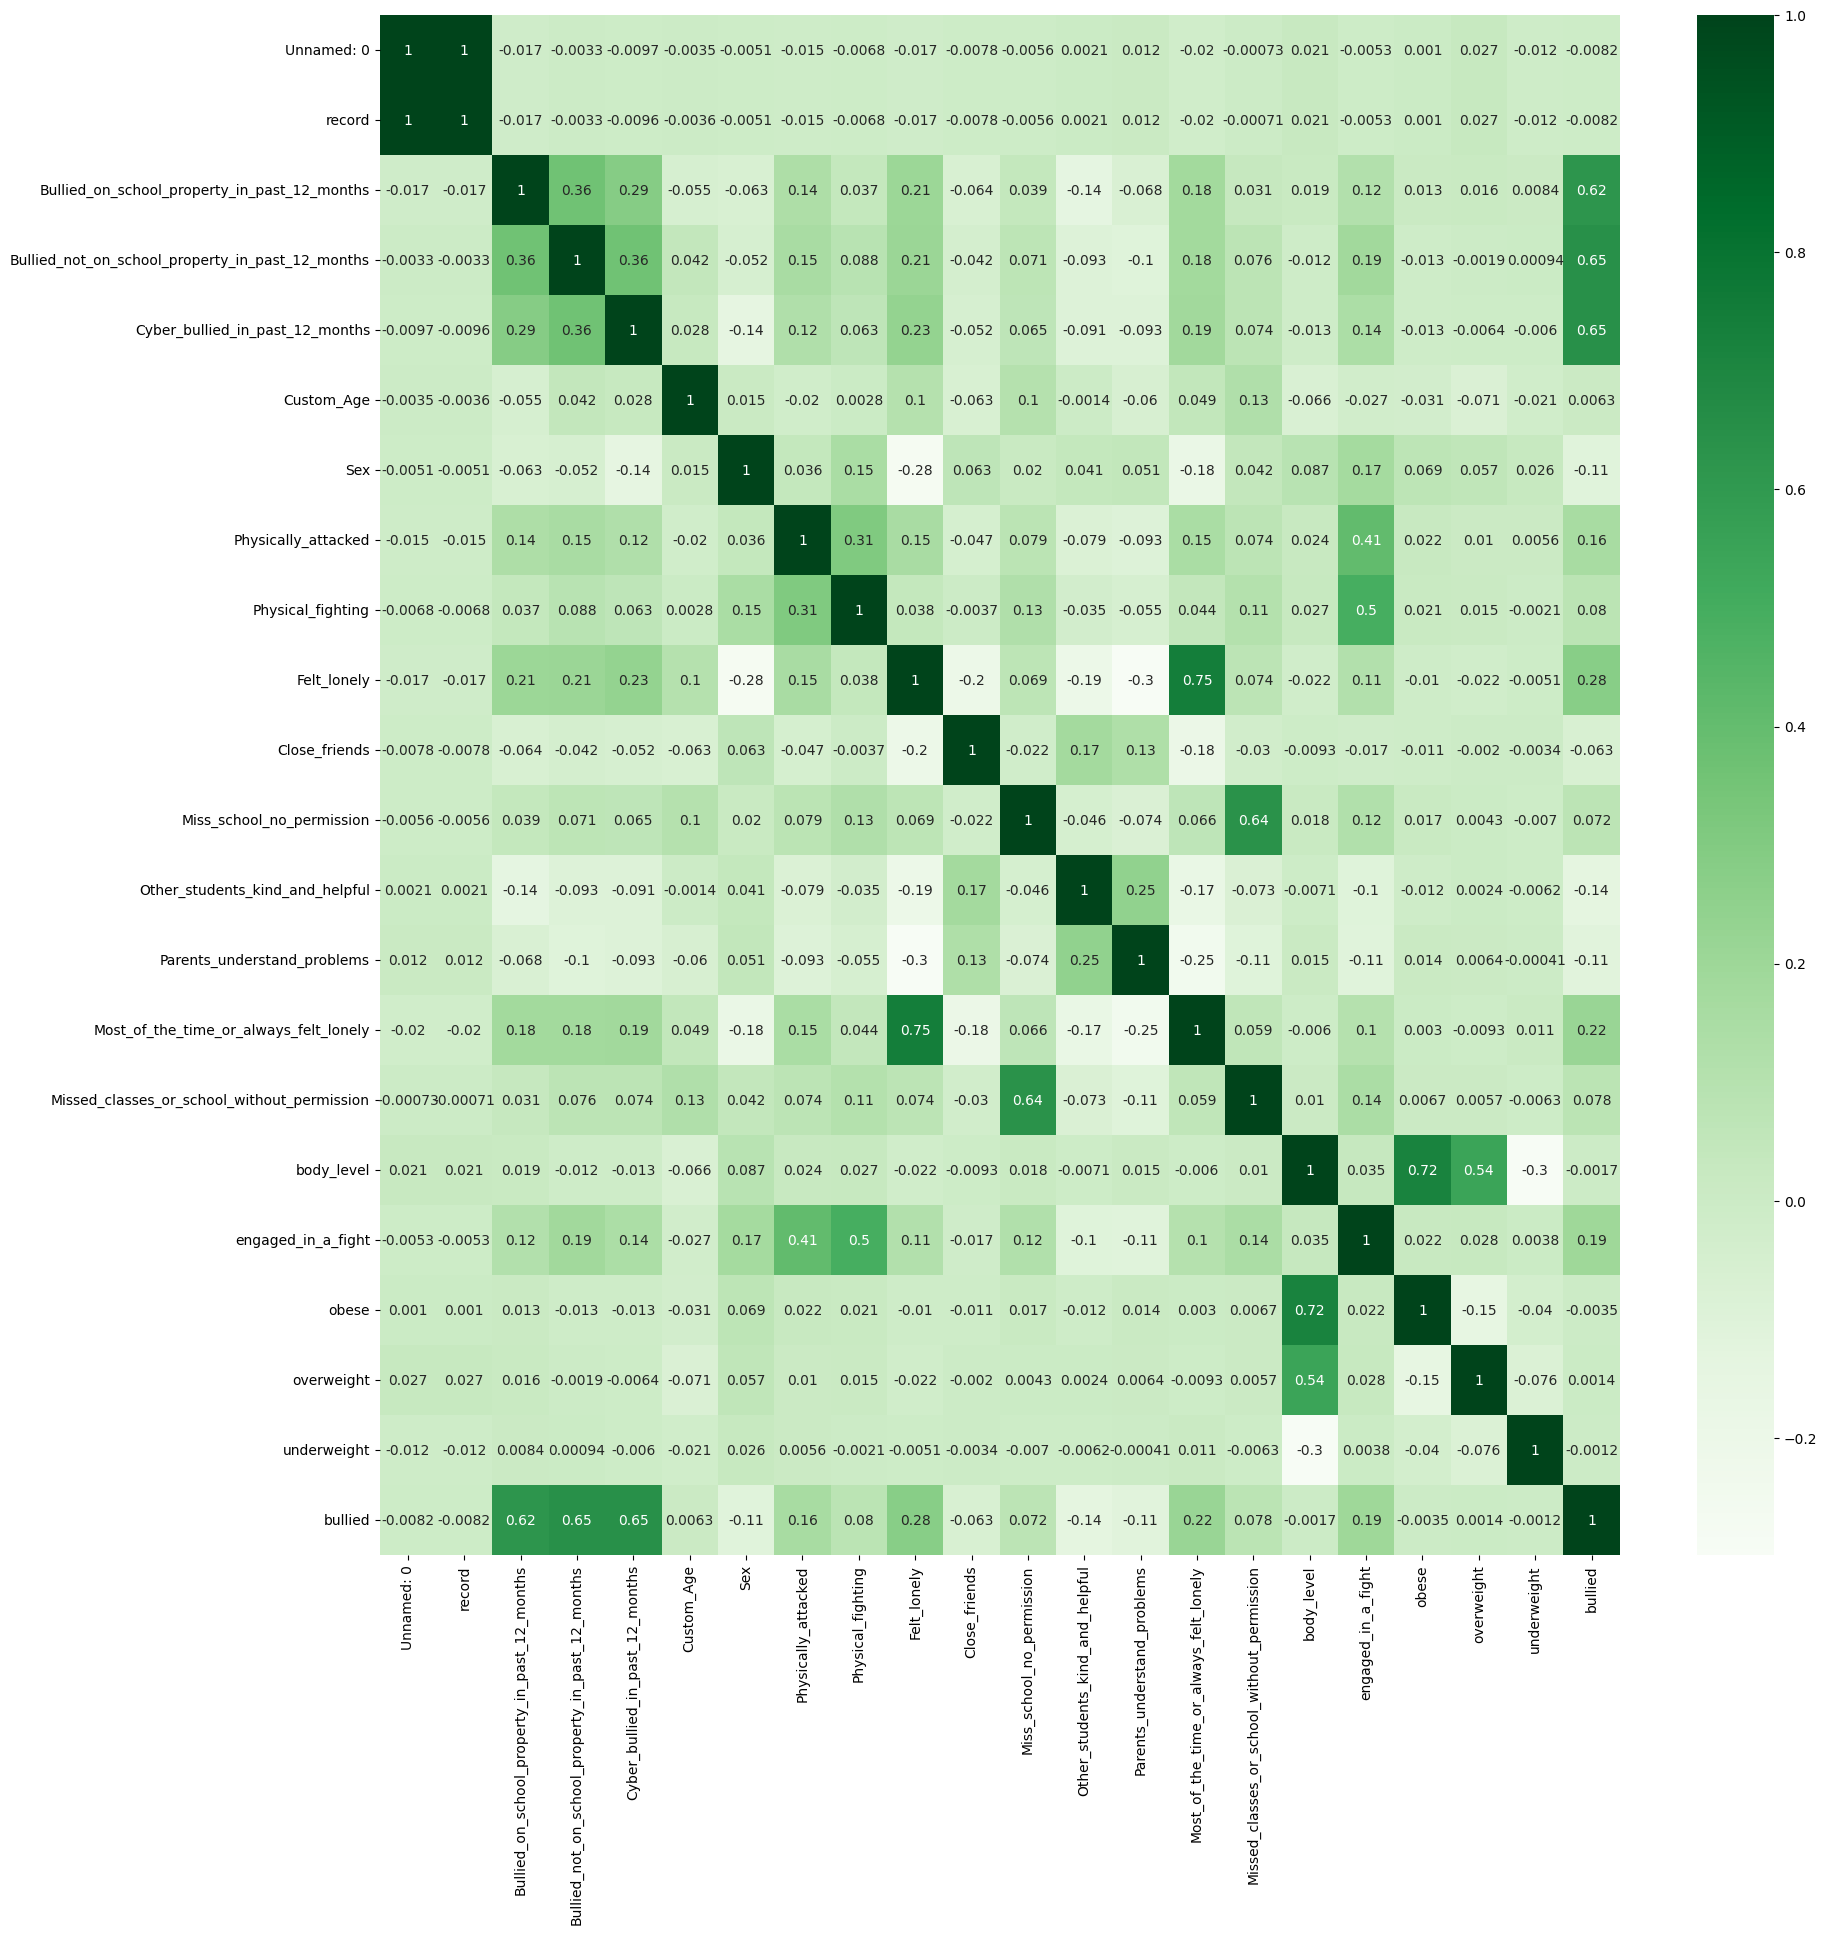

In [92]:
corr = df3.corr(numeric_only = False)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Greens",annot=True)
plt.show()

In [104]:
#Pearson's Correlation test
stat, p = pearsonr(df3['Close_friends'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.063, p=0.000
Probably dependent


In [105]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
temp = df3.copy()
temp['Close_friends'] = pd.to_numeric(df2['Close_friends'], errors='coerce')
stat, p = spearmanr(temp['Close_friends'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.069, p=0.000
Probably dependent


In [109]:
#Pearson's Correlation test
stat, p = pearsonr(df3['body_level'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.002, p=0.763
Probably independent


In [108]:
# Spearman's Rank Correlation Test
temp = df3.copy()

stat, p = spearmanr(temp['body_level'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.001, p=0.862
Probably independent


In [110]:
#Pearson's Correlation test
stat, p = pearsonr(df3['Other_students_kind_and_helpful'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.136, p=0.000
Probably dependent


In [ ]:
# Spearman's Rank Correlation Test
temp = df3.copy()
stat, p = spearmanr(temp['Other_students_kind_and_helpful'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.069, p=0.000
Probably dependent


In [113]:
#Pearson's Correlation test
stat, p = pearsonr(df3['Custom_Age'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')


stat=0.006, p=0.252
Probably independent


In [112]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
temp = df3.copy()
stat, p = spearmanr(temp['Custom_Age'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.006, p=0.247
Probably independent


In [114]:
#Pearson's Correlation test
stat, p = pearsonr(df3['Sex'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')


stat=-0.108, p=0.000
Probably dependent


In [115]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
temp = df3.copy()
stat, p = spearmanr(temp['Sex'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.108, p=0.000
Probably dependent


In [116]:
#Pearson's Correlation test
stat, p = pearsonr(df3['Parents_understand_problems'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.112, p=0.000
Probably dependent


In [117]:

# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
temp = df3.copy()

stat, p = spearmanr(temp['Parents_understand_problems'], df3['bullied'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.112, p=0.000
Probably dependent
